# Example of regression

## The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass. 

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. 

Dataset contains information about 506 different houses in Boston.

Dataset features
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## Objective
Create different models predicting houses's prices based on input features.

# 1. Linear regression model

### Read input data from CSV file

In [1]:
# library for working with CSV files
import pandas as pd 

In [2]:
data = pd.read_csv ("HousingData.csv")

In [3]:
# information about file structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Data exploration

Before selecting and creating model, it is advisable to have an overview of the input data.
This can prevent later problems. For example, some models require specific data.

In [4]:
# first 10 rows
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
# columns statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Some columns contains NULL data. We have to decide how to solve this problem. 
* Incomplete rows can be removed from the dataset
* Problematic columns should not be model input parameters
* Missing values could fabricated as average, zeros, ...
* ...

In [6]:
corr=data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


A strong direct or indirect correlation may indicate a relationship between the input parameters. 
This can help us in choosing the input parameters of the model.

In [7]:
# libraries for generating graphs
import seaborn as sns
import matplotlib.pyplot as plt

Sometimes it can be helpful to display correlations using a heatmap.
For instance feature CHAS (Charles River dummy variable) has no relation with other features.

<Axes: >

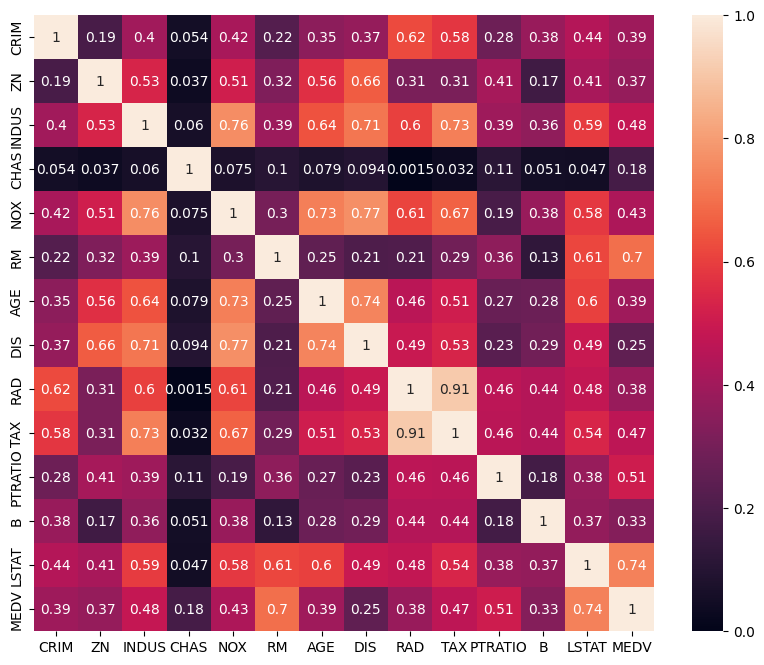

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

### Data visualization

Visualization of columns' data distribution could discover skewed, abnormal values. 

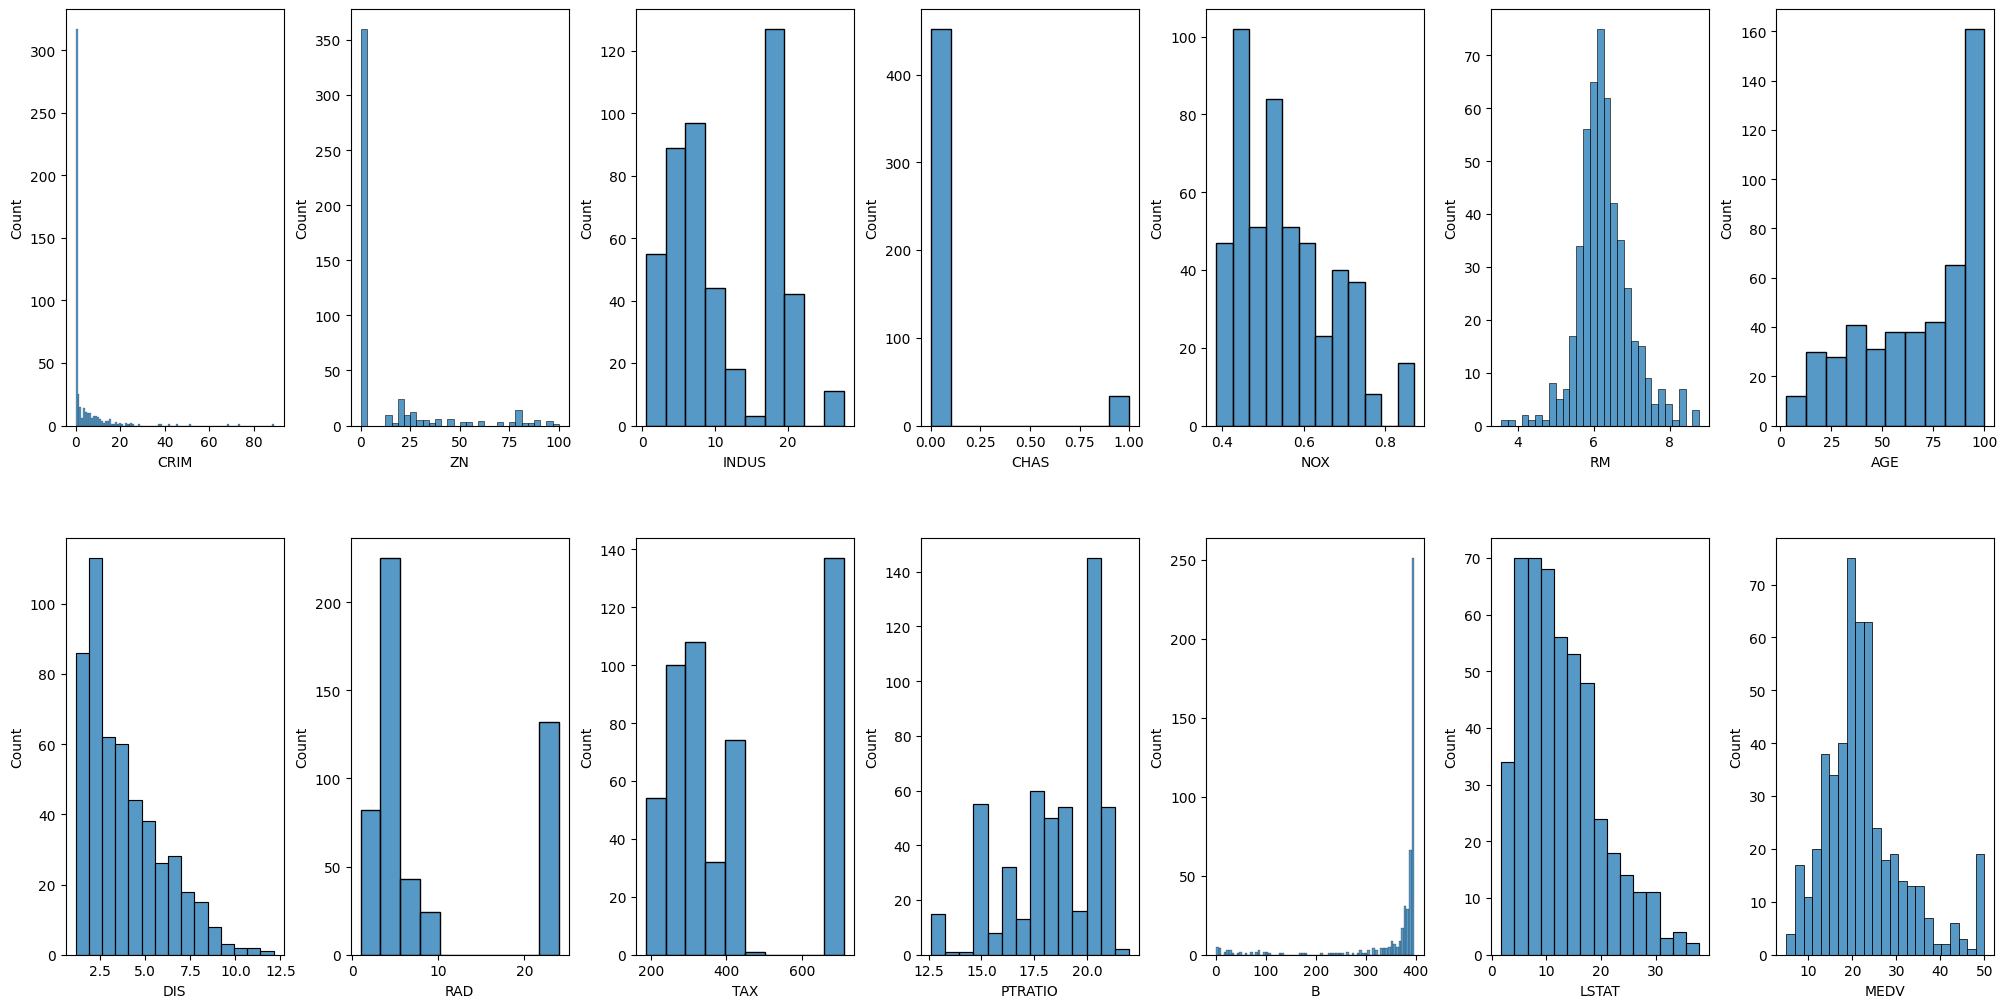

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

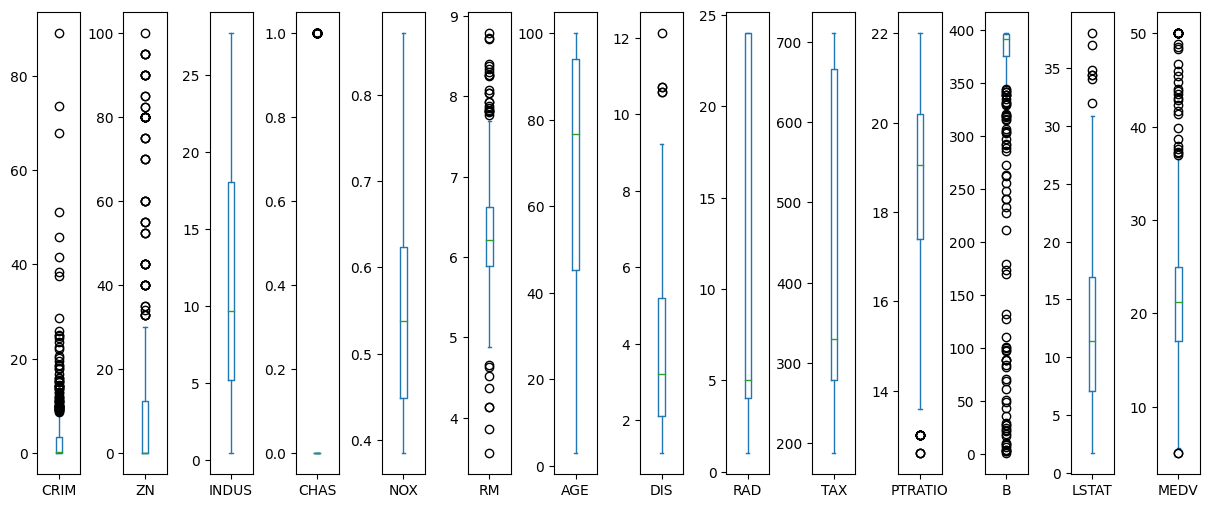

In [10]:
# same information shown in boxplot
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

Creating graphs for all combination of two features could shown us type of dependency.

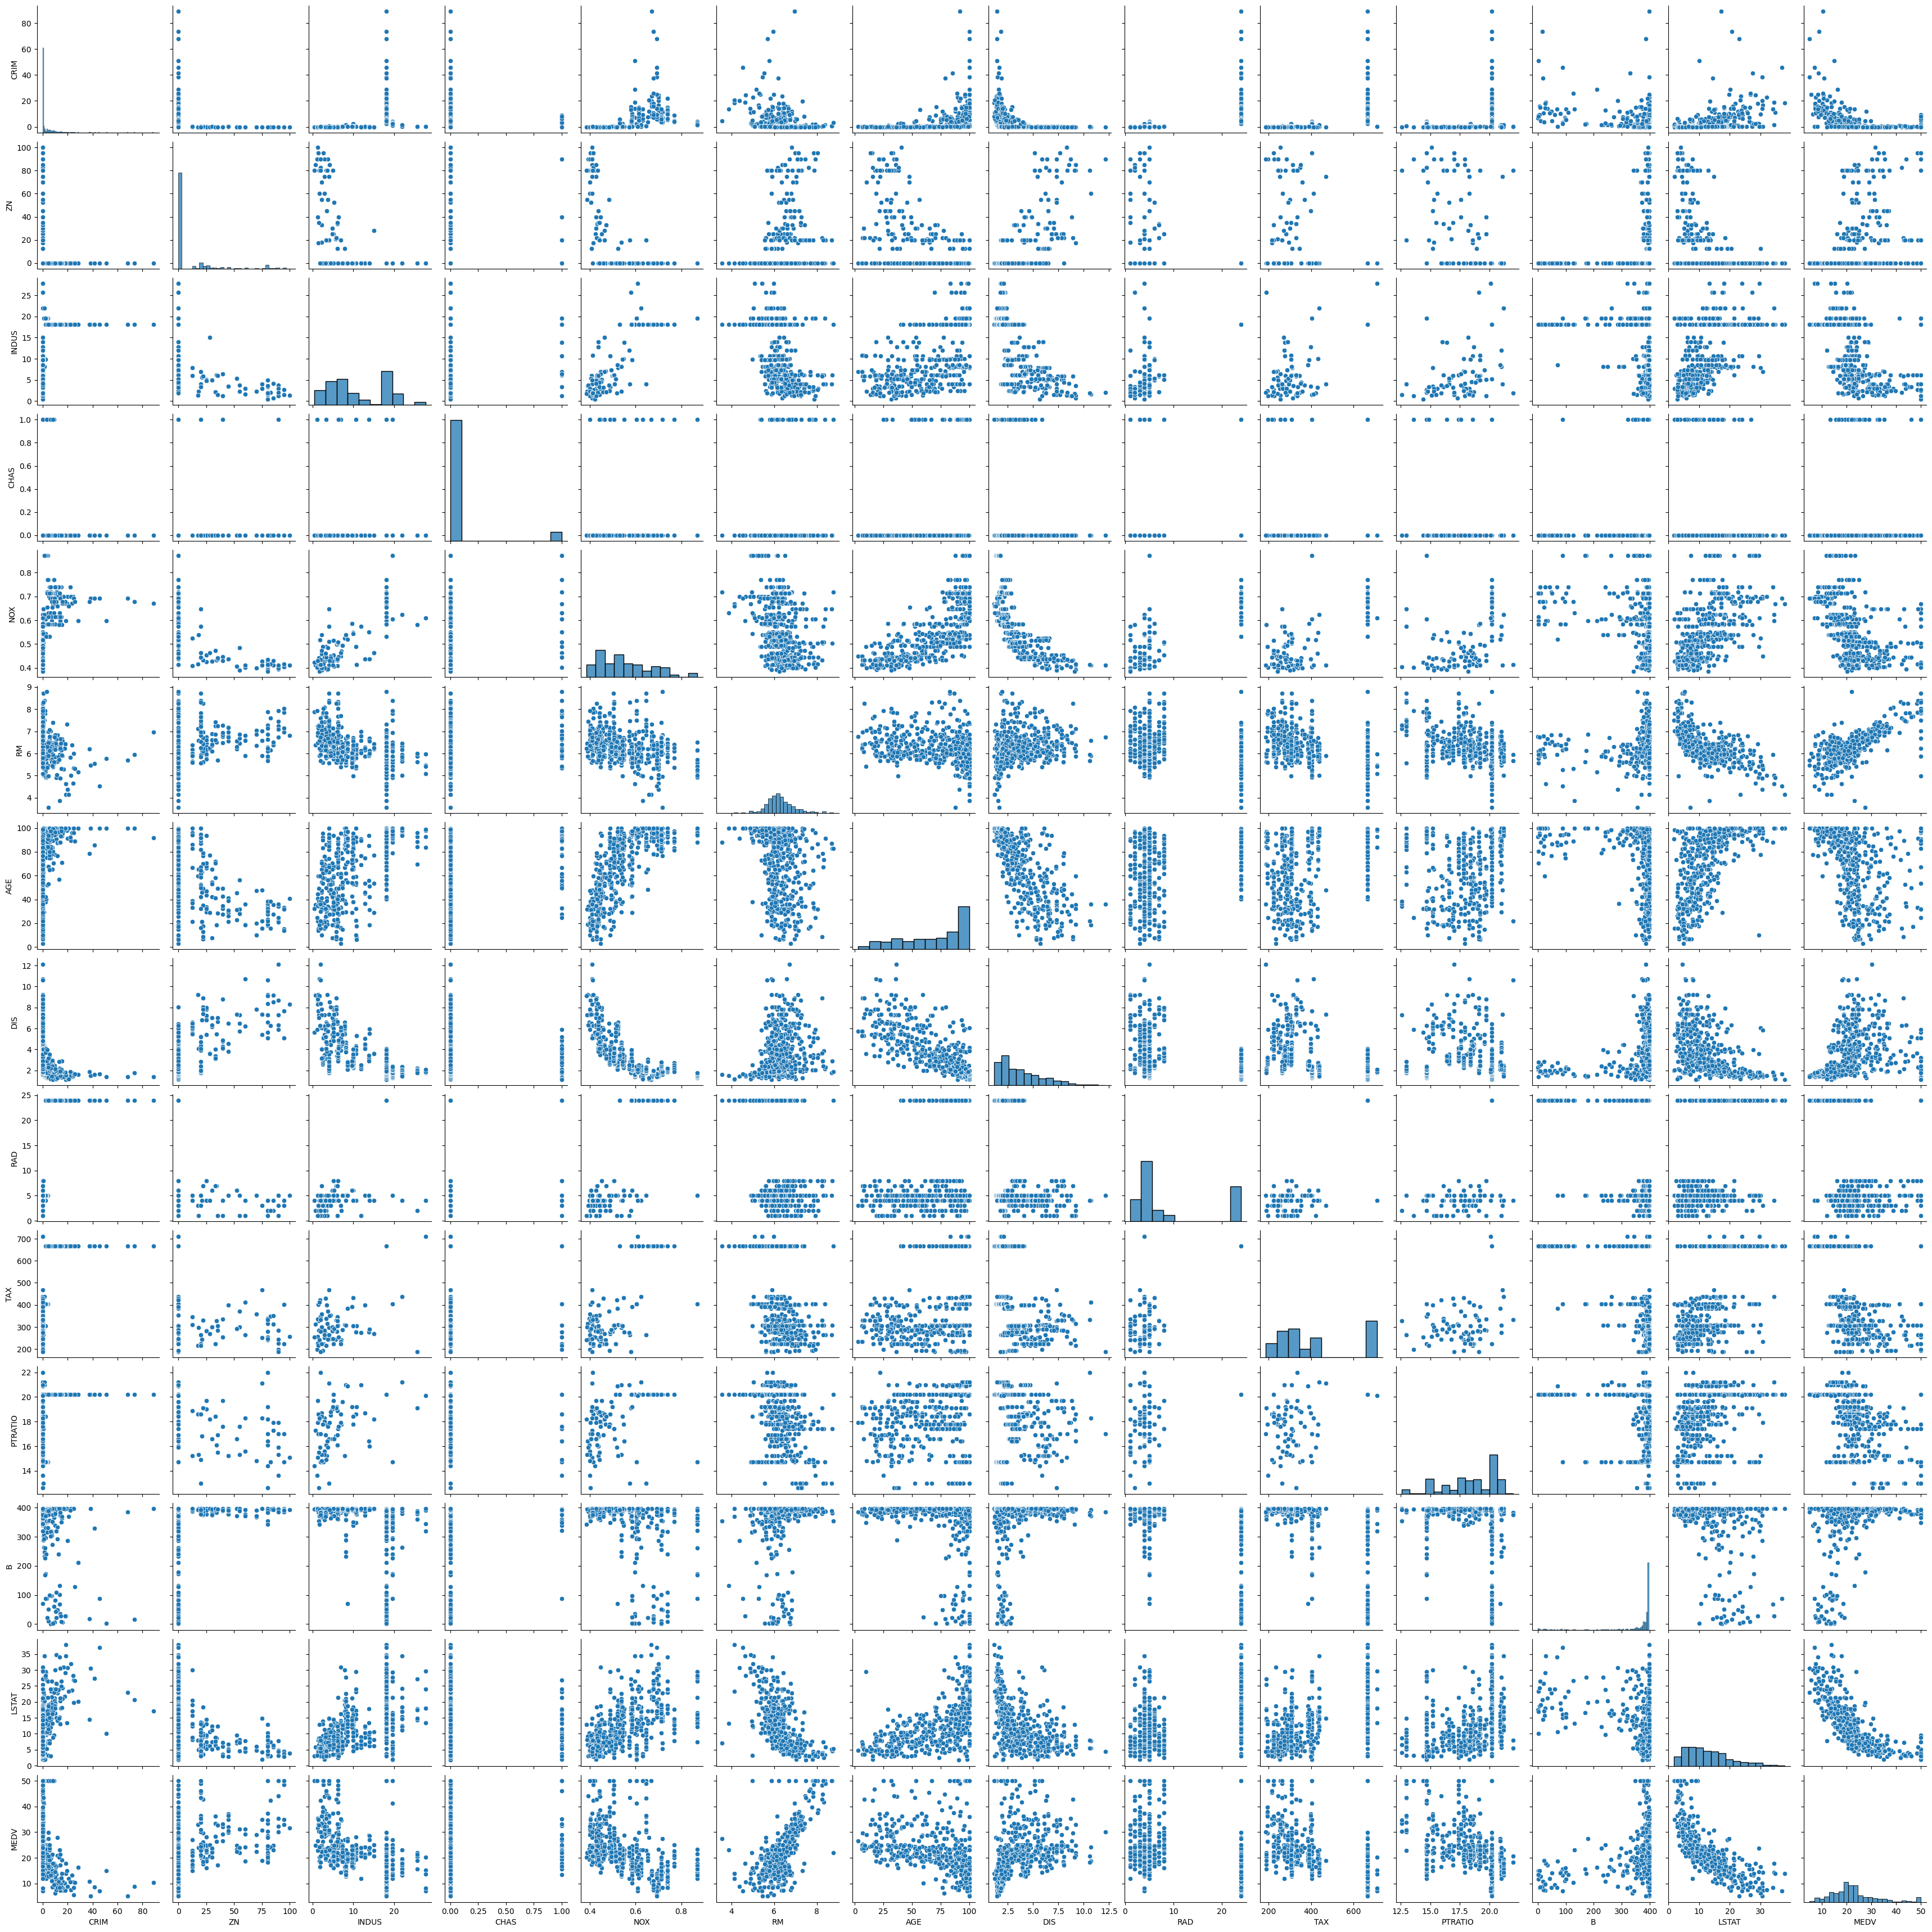

In [11]:
sns.pairplot(data)

We will use Linear regression model. There is a linear dependency between columns RM, LSTAT na MEDV.

* RM - average number of rooms per dwelling
* LSTAT - percentage lower status of the population

### Data preparation

Before we push data into model, we will do some transformation.

In [12]:
# Printing colums with NULL values
print (data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


Removing rows with NULL values

In [13]:
data=data.dropna()

Sometimes is usefull to eliminate data with extrem values. 
We will remove the rows from the dataset where the median value of house is above 50.

In [14]:
data = data[~(data['MEDV'] >= 50.0)]

In [15]:
# library for n-dimension arrays, comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
import numpy as np

We will split data into input parameters X and results Y.

In [16]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']

In [17]:
X.describe()

,LSTAT,RM
count,382.000000,382.000000
mean,13.026466,6.236757
std,7.260275,0.646613
min,1.980000,3.561000
25%,7.280000,5.876500
50%,11.645000,6.173000
75%,17.205000,6.554250
max,37.970000,8.780000


In [18]:
Y.describe()

count    382.000000
mean      21.491361
std        7.836351
min        5.000000
25%       16.625000
50%       20.800000
75%       24.500000
max       48.500000
Name: MEDV, dtype: float64

### Splitting dataset into train, test and validation subsets

In [19]:
# library with supervised and unsupervised learning algorithms
from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

(286, 2)
(57, 2)
(39, 2)


### Training linear regression model

In [20]:
# importing library and creating model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [21]:
# fit training data into model
lin_model.fit(X_train, Y_train)

LinearRegression()

### Validating model

In [22]:
# importing metrics 
# MSE - mean_squared_error
# RMSE - root mean square error
# R2 (coefficient of determination) regression score function. Best score is 1.0

from sklearn.metrics import mean_squared_error, r2_score

We could evaluate how accure model will predict value based on training data

In [23]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.024366305772751
R2 score is 0.7331281547285835


More telling is the score computed on data not used during learning

In [24]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for validating set")
print("----------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for validating set
----------------------------------------
RMSE is 5.95281531462318
R2 score is 0.5591275675466584


In [25]:
y_val_predict = lin_model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2 = r2_score(Y_val, y_val_predict)

print("The model performance for validating set")
print("----------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for validating set
----------------------------------------
RMSE is 5.789838419406295
R2 score is 0.3390131686078154


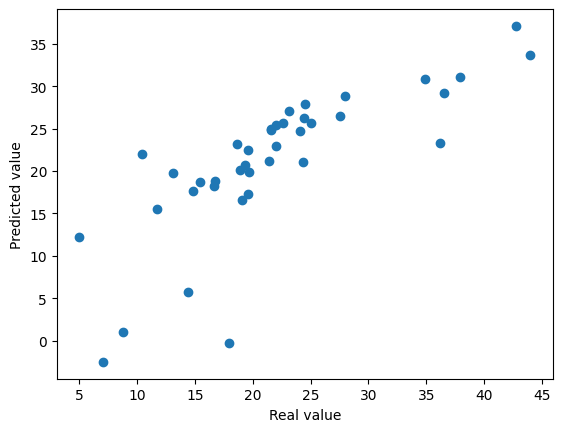

In [26]:
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.show()

### Trained parameter model

In [27]:
print("Coefficients: \n", lin_model.coef_)

Coefficients: 
 [-0.66339811  4.65788016]


### Save trained model to file

In [28]:
import pickle
filename = 'regression_linear_model.sav'
pickle.dump(lin_model, open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open(filename, 'rb'))

# 2. Neural network

In [30]:
# Splitting input dataset into input and output values
X = data.iloc[:,:-1]
Y = data['MEDV']

In [31]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,382.000000,382.000000,382.00000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.00000,382.000000,382.000000,382.000000
mean,3.724613,11.022251,11.00212,0.060209,0.553028,6.236757,68.747644,3.837562,9.400524,406.84555,18.620419,357.773482,13.026466
std,9.326383,23.281855,6.87076,0.238186,0.113683,0.646613,27.880517,2.102186,8.637603,168.21574,2.093999,90.552218,7.260275
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.137000,1.000000,187.00000,12.600000,2.600000,1.980000
25%,0.081955,0.000000,5.14500,0.000000,0.453000,5.876500,45.475000,2.122250,4.000000,281.00000,17.600000,376.735000,7.280000
50%,0.260420,0.000000,8.56000,0.000000,0.538000,6.173000,77.100000,3.272100,5.000000,330.00000,19.100000,392.415000,11.645000
75%,3.435973,12.500000,18.10000,0.000000,0.624000,6.554250,94.100000,5.116700,24.000000,666.00000,20.200000,396.900000,17.205000
max,88.976200,100.000000,27.74000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.00000,22.000000,396.900000,37.970000


In [32]:
Y.describe()

count    382.000000
mean      21.491361
std        7.836351
min        5.000000
25%       16.625000
50%       20.800000
75%       24.500000
max       48.500000
Name: MEDV, dtype: float64

### Data standardization

Every feature has different mean, standard deviation.

Standardization center and scale features.

Reasons:
* prevent some features from dominating the model
* can help machine learning models converge more quickly
* can make it easier to interpret the coefficients of a machine learning model

Calculation:
* x_new = (x – mean) / standard_deviation
* mean = sum(x) / count(x)
* standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Same transformation must be done on real input data. Settings of scaler discovered during training must be saved. 

In [34]:
import joblib
joblib.dump(sc, 'regression_std_scaler.bin', compress=True)
sc=joblib.load('regression_std_scaler.bin')

### Splitting dataset into train, test and validation subsets

In [35]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

(286, 13)
(57, 13)
(39, 13)


### Modeling neural network
Keras library will be used for developing the neural network.

In [36]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

Model of neural network
* Sequential model - data is passed from input layer through hidden layers to output layer.
* Dense layer connect each neuron from previous layer to each neuron in layer
* Activation functions RELU and Linear are used. Linear function is used in output layer because this project is regression.
* The purpose of the activation function is to introduce non-linearity into the output of a neuron.

* The compilation is the final step in creating a model.
* The optimizer we are using is adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
* Loss function - mean square error
* During learning another metrics is computed - Mean absolut error

Dense layer
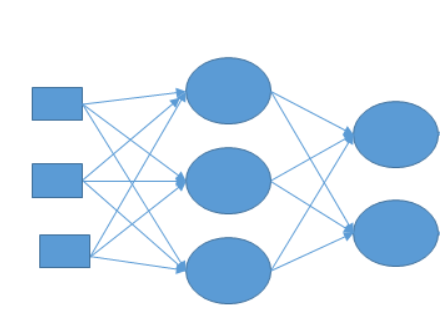

In [37]:
model = Sequential()
model.add(Dense(128,activation = 'relu', input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'linear'))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [39]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

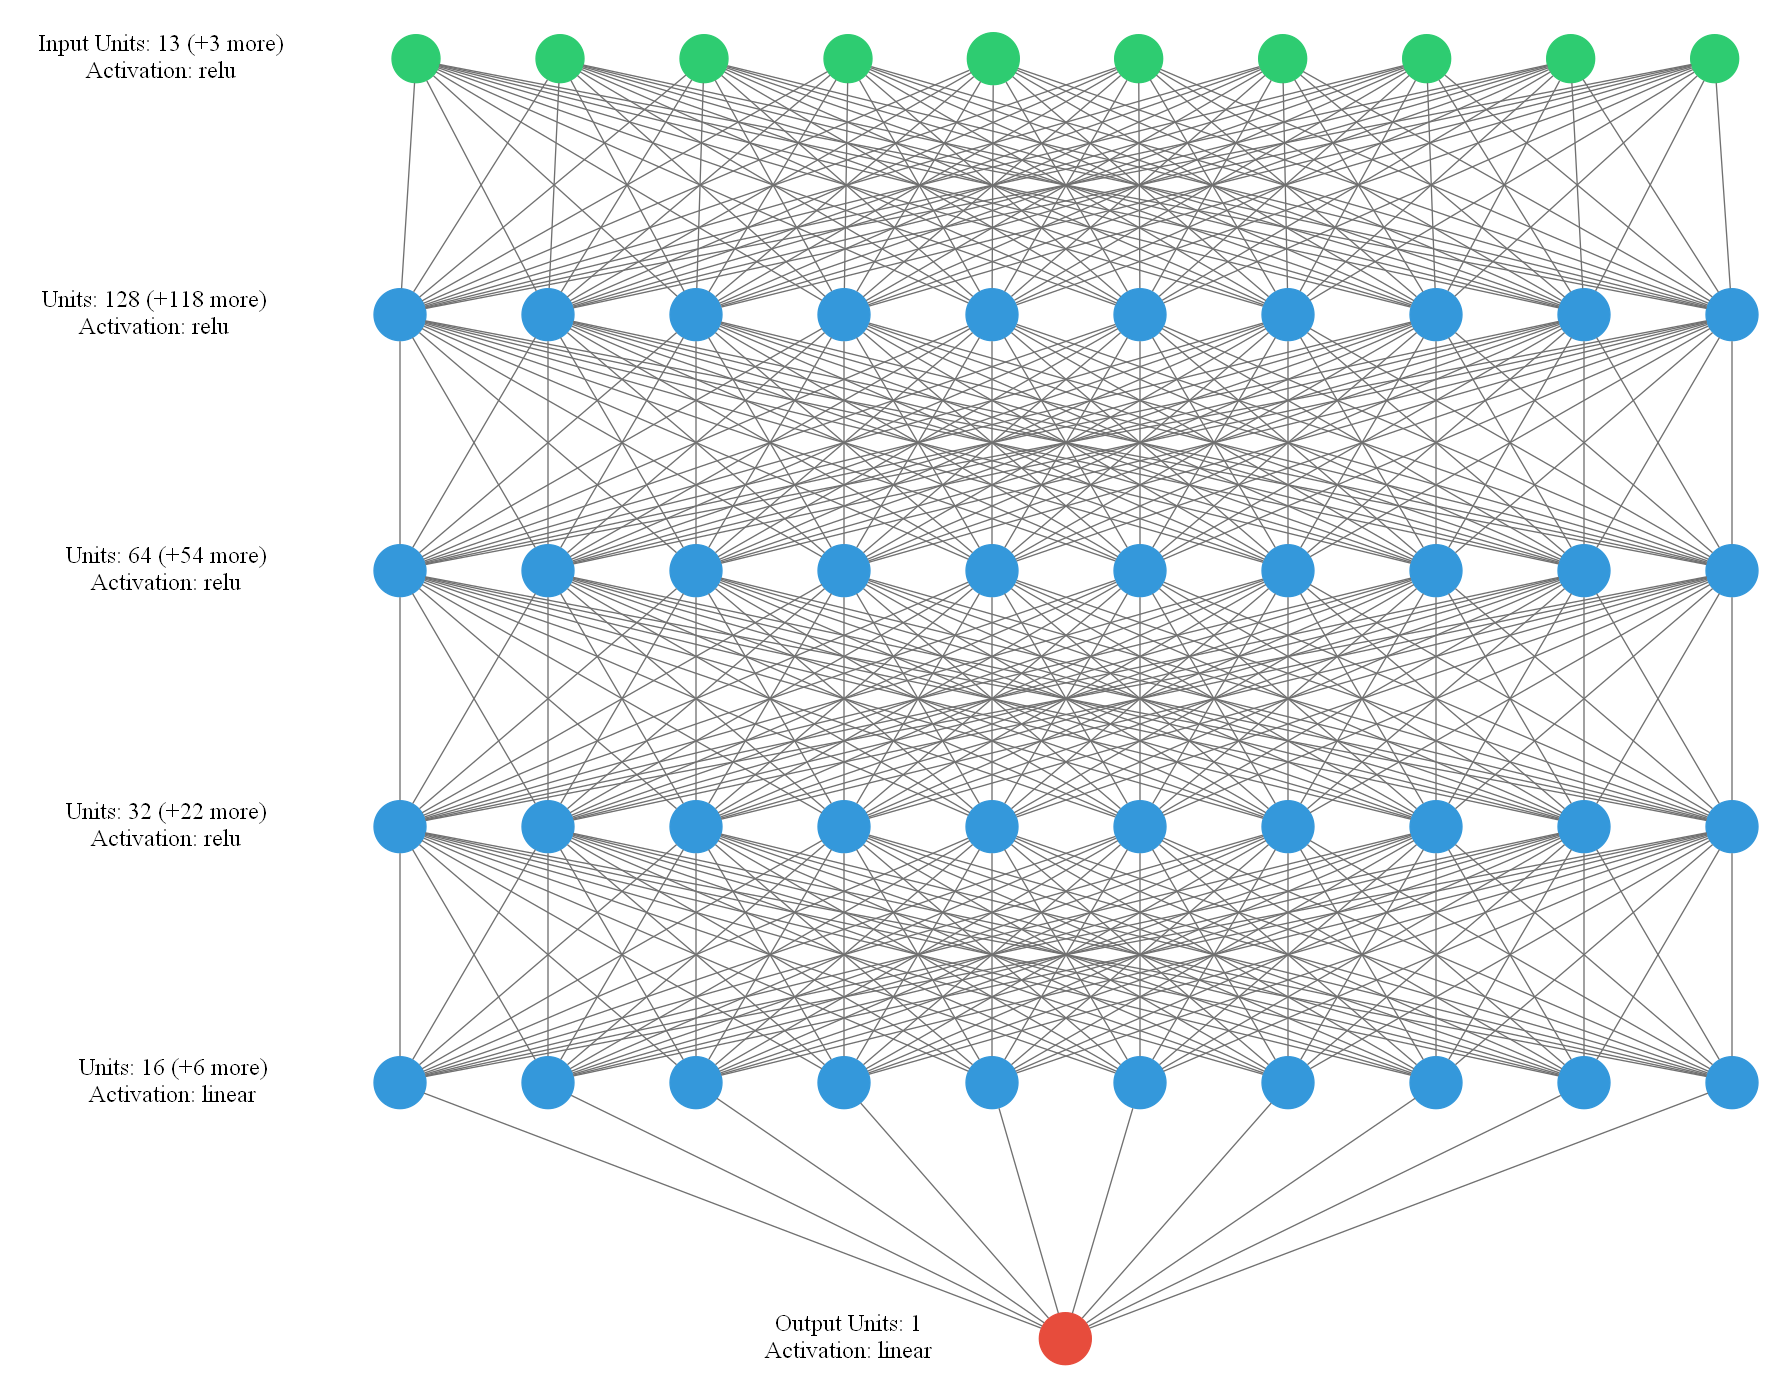

Process of learning is executed by method fit, which is called with following parameters.
* X_train, Y_train - training dataset
* epochs - maximum times of repeat learning data
* batch_size - training data is sliced into batches
* validation_data - after epoch, quality of model is tested on validation dataset, which is not used for training
* callbacks - training could be stopped if multiple training epoch don't improve model.

In [40]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history=model.fit(X_train, Y_train, epochs = 100, batch_size=5, validation_data=(X_val, Y_val), callbacks=[early_stop])

Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 267.5410 - mae: 13.4697 - val_loss: 33.5077 - val_mae: 4.7667
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 24.8246 - mae: 3.8114 - val_loss: 15.1227 - val_mae: 3.1128
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 12.6186 - mae: 2.7515 - val_loss: 14.9136 - val_mae: 3.1351
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 10.0228 - mae: 2.4641 - val_loss: 13.3106 - val_mae: 2.8068
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 9.3684 - mae: 2.3473 - val_loss: 10.8292 - val_mae: 2.5984
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 7.8622 - mae: 2.1413 - val_loss: 9.3300 - val_mae: 2.2960
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 8.2551 - mae: 2.1686 - val_loss: 9.4312 - val_mae: 2.3273
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss:

### Evaluation of model
Trained model is evaluated on test data set. This data model doen't see during learning phase.

Model predict result from input data.

In [41]:
Y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


For evaluating function R^2 (coefficient of determination) is used. Best possible score is 1.0. The model predict results, that is equal to real results.

This score can be used to select the best model.

In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print(r2)

0.9068324065884363


### History of learning

Graphs show the model improvement history.

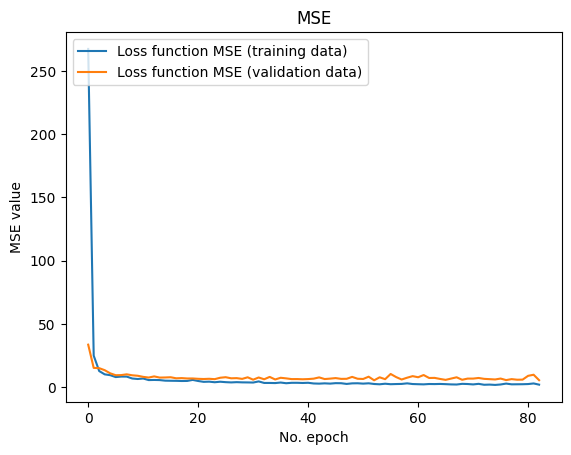

In [43]:
plt.plot(history.history['loss'], label='Loss function MSE (training data)')
plt.plot(history.history['val_loss'], label='Loss function MSE (validation data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

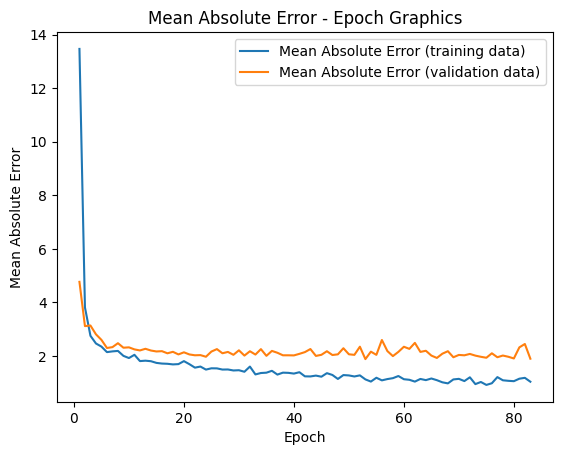

In [44]:
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'])
plt.legend(['Mean Absolute Error (training data)', 'Mean Absolute Error (validation data)'])
plt.show()

In [45]:
# save model to file
model.save('regresion_model.h5')

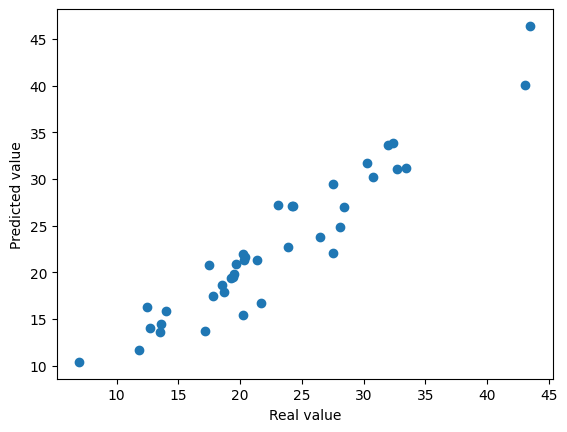

In [46]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.show()